<a href="https://colab.research.google.com/github/mohantechis/Bitcoin_Price_spliting/blob/main/Bit_Coin_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We've got a lot to go through.

* Get time series data (the historical price of Bitcoin)

  *  Load in time series data using pandas/Python's CSV module

* Format data for a time series problem
  * Creating training and test sets (the right way)
  * Visualizing time series data
  

# Check For GPU
In order for our deep learning models to run as fast as possible, we'll need access to a GPU.

In Google Colab, you can set this up by going to Runtime -> Change runtime type -> Hardware accelerator -> GPU.

After selecting GPU, you may have to restart the runtime.

In [3]:
#check for GPU
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [4]:
#import the pandas 
import pandas as pd
#Parse dats and set date column to index
df=pd.read_csv("/content/drive/MyDrive/Dataset/BTC_USD_2014-11-02_2021-11-20-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-02,BTC,325.22633,338.01050,338.12950,319.36700
2014-11-03,BTC,331.60083,325.22633,333.75983,319.04350
2014-11-04,BTC,324.71833,331.60083,332.75133,323.06333
2014-11-05,BTC,332.45666,324.71833,335.81166,320.93333
2014-11-06,BTC,336.58500,332.45666,341.49000,328.56166


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2571 entries, 2014-11-02 to 2021-11-20
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2571 non-null   object 
 1   Closing Price (USD)  2571 non-null   float64
 2   24h Open (USD)       2571 non-null   float64
 3   24h High (USD)       2571 non-null   float64
 4   24h Low (USD)        2571 non-null   float64
dtypes: float64(4), object(1)
memory usage: 120.5+ KB


In [6]:
#shape of Data
df.shape

(2571, 5)

***Seasonality:*** The frequency at which a time series value is collected is often referred to as seasonality. This is usually mesaured in number of samples per year. For example, collecting the price of Bitcoin once per day would result in a time series with a seasonality of 365.

In [7]:
#only want closing Price for each day
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2014-11-02,325.22633
2014-11-03,331.60083
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500


In [8]:
bitcoin_prices.tail()

,Price
Date,
2021-11-16,63758.430171
2021-11-17,60716.098533
2021-11-18,60049.920317
2021-11-19,56936.516170
2021-11-20,57896.166603


Lets Plot Everything We've Got.

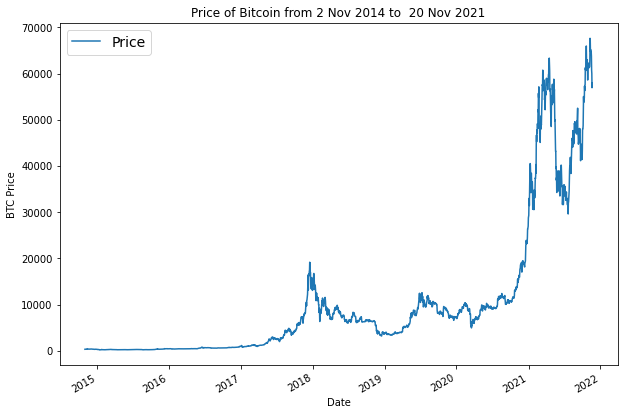

In [9]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 2 Nov 2014 to  20 Nov 2021")
plt.xticks()
plt.legend(fontsize=14)
plt.show()

If your time series data comes in CSV form you don't necessarily have to use pandas.


In [10]:
import csv
from datetime import datetime
timesteps=[]
btc_price=[]
with open("/content/drive/MyDrive/Dataset/BTC_USD_2014-11-02_2021-11-20-CoinDesk.csv","r") as f:
  csv_reader=csv.reader(f,delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))
timesteps[:10],btc_price[:10]

([datetime.datetime(2014, 11, 2, 0, 0),
  datetime.datetime(2014, 11, 3, 0, 0),
  datetime.datetime(2014, 11, 4, 0, 0),
  datetime.datetime(2014, 11, 5, 0, 0),
  datetime.datetime(2014, 11, 6, 0, 0),
  datetime.datetime(2014, 11, 7, 0, 0),
  datetime.datetime(2014, 11, 8, 0, 0),
  datetime.datetime(2014, 11, 9, 0, 0),
  datetime.datetime(2014, 11, 10, 0, 0),
  datetime.datetime(2014, 11, 11, 0, 0)],
 [325.22633,
  331.60083,
  324.71833,
  332.45666,
  336.585,
  346.775,
  344.81166,
  343.065,
  358.50166,
  368.07666])

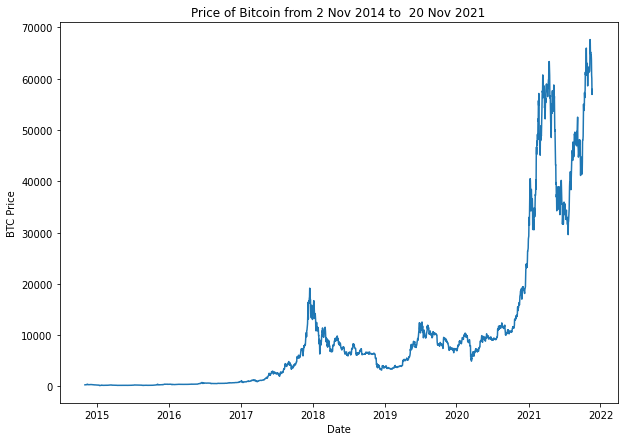

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 2 Nov 2014 to  20 Nov 2021")
plt.show()

In [12]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-11-02T00:00:00.000000000', '2014-11-03T00:00:00.000000000',
        '2014-11-04T00:00:00.000000000', '2014-11-05T00:00:00.000000000',
        '2014-11-06T00:00:00.000000000', '2014-11-07T00:00:00.000000000',
        '2014-11-08T00:00:00.000000000', '2014-11-09T00:00:00.000000000',
        '2014-11-10T00:00:00.000000000', '2014-11-11T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
        344.81166, 343.065  , 358.50166, 368.07666]))

In [13]:
#create Train and test splits the right way for time series data
split_size=int(0.8*len(prices)) #80% train 20% test
X_train,y_train=timesteps[:split_size],prices[:split_size]
X_test,y_test=timesteps[split_size:],prices[split_size:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2056,), (515,), (2056,), (515,))

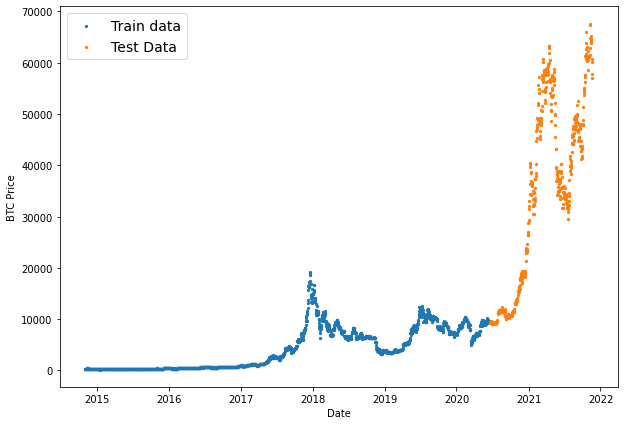

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

In [15]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("TIME")
  plt.ylabel("BTC PRICE")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

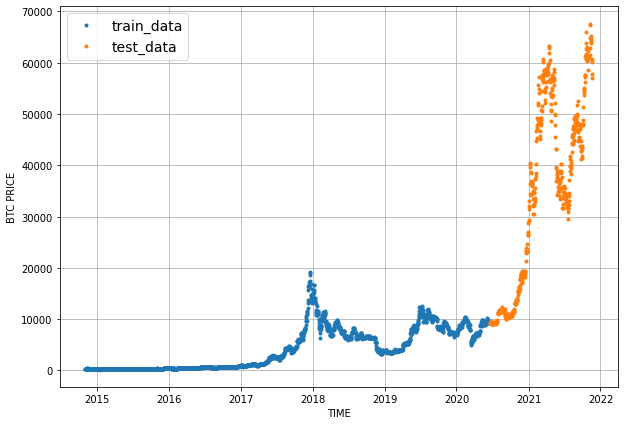

In [16]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="train_data")
plot_time_series(timesteps=X_test,values=y_test,label="test_data")
